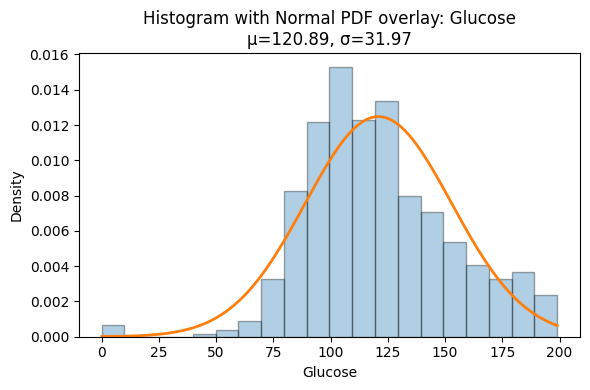

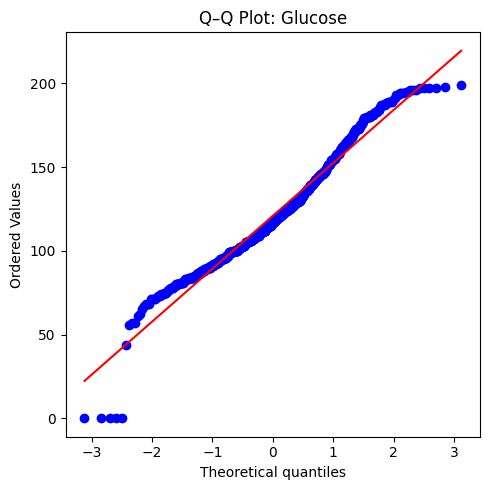

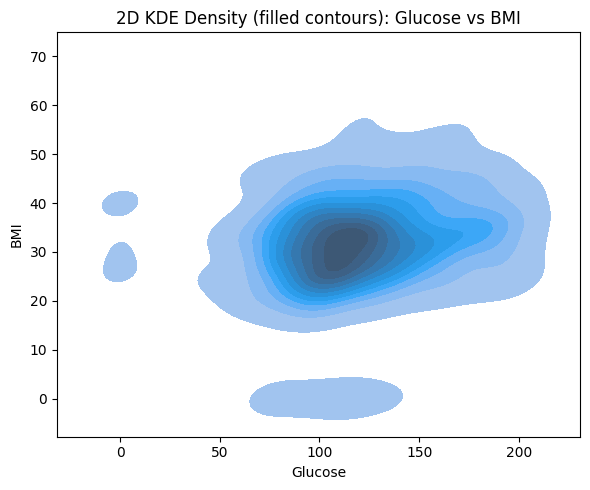

C:\Users\Anitus A\AppData\Local\Temp\ipykernel_2412\1597351899.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome')


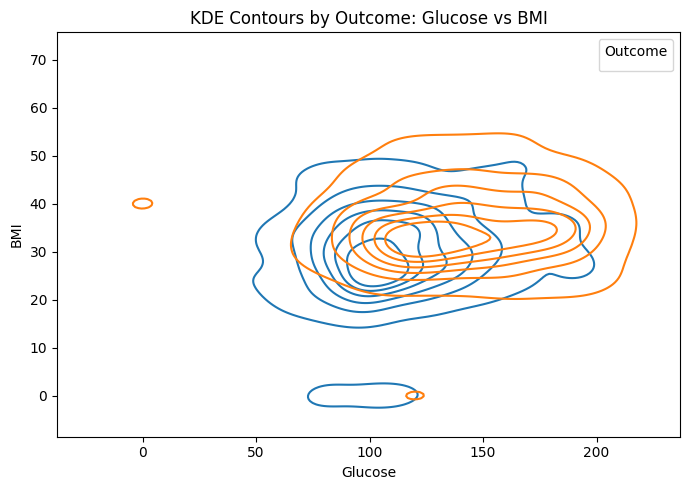

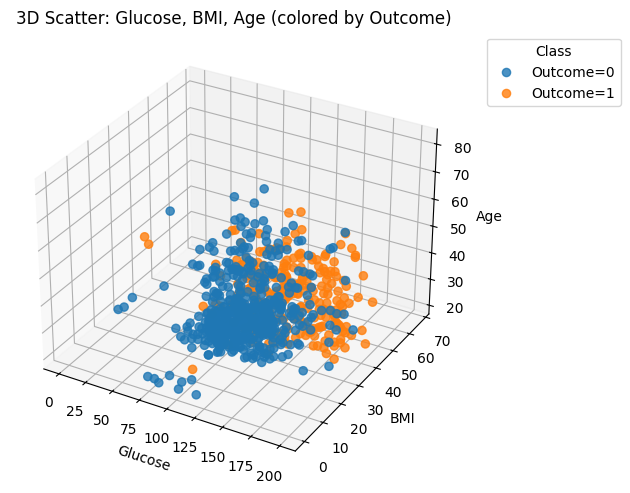

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (enables 3D) 
# 1) Load data 
df = pd.read_csv("C:/Users/Anitus A/Downloads/fds/diabetes.csv")   # ensure this file is present 
# Basic sanity check 
numeric_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 
'DiabetesPedigreeFunction','Age'] 
assert set(numeric_cols).issubset(df.columns), "Check column names in your diabetes.csv" 
# ----------------------------- 
# (a) NORMAL VALUES (Glucose) 
# ----------------------------- 
feature = 'Glucose' 
x = df[feature].dropna().values 
# Histogram + Normal PDF overlay 
mu, sigma = x.mean(), x.std(ddof=1) 
xs = np.linspace(x.min(), x.max(), 300) 
pdf = stats.norm.pdf(xs, loc=mu, scale=sigma) 
plt.figure(figsize=(6,4)) 
plt.hist(x, bins=20, density=True, alpha=0.35, edgecolor='black') 
plt.plot(xs, pdf, linewidth=2) 
plt.title(f'Histogram with Normal PDF overlay: {feature}\nμ={mu:.2f}, σ={sigma:.2f}') 
plt.xlabel(feature); plt.ylabel('Density') 
plt.tight_layout(); plt.show() 
# Q–Q plot 
plt.figure(figsize=(5,5)) 
stats.probplot(x, dist="norm", plot=plt) 
plt.title(f'Q–Q Plot: {feature}') 
plt.tight_layout(); plt.show() 
# ----------------------------------------- 
# (b) DENSITY & CONTOUR (Glucose vs BMI) 
# ----------------------------------------- 
x_feat, y_feat = 'Glucose', 'BMI' 
# Filled KDE (overall) 
plt.figure(figsize=(6,5)) 
sns.kdeplot(data=df, x=x_feat, y=y_feat, fill=True, thresh=0.02, levels=12) 
plt.title(f'2D KDE Density (filled contours): {x_feat} vs {y_feat}') 
plt.tight_layout(); plt.show() 
# Contour lines, separated by Outcome (0/1) 
plt.figure(figsize=(7,5)) 
for out, sub in df.groupby('Outcome'): 
    sns.kdeplot(data=sub, x=x_feat, y=y_feat, levels=7, label=f'Outcome={out}') 
plt.legend(title='Outcome') 
plt.title(f'KDE Contours by Outcome: {x_feat} vs {y_feat}') 
plt.tight_layout(); plt.show() 
# --------------------------------
# (c) THREE-DIMENSIONAL PLOTTING 
# --------------------------------
fig = plt.figure(figsize=(7,5)) 
ax = fig.add_subplot(111, projection='3d') 
# Plot per class to get a proper legend 
palette = {0: '#1f77b4', 1: '#ff7f0e'} 
for out, sub in df.groupby('Outcome'): 
    ax.scatter( 
    sub['Glucose'], 
    sub['BMI'], 
    sub['Age'], 
    s=35, alpha=0.8, 
    color=palette[out], 
    label=f'Outcome={out}' 
    ) 
ax.set_xlabel('Glucose') 
ax.set_ylabel('BMI') 
ax.set_zlabel('Age') 
ax.set_title('3D Scatter: Glucose, BMI, Age (colored by Outcome)') 
ax.legend(title='Class', loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout(); plt.show() 